In [1]:
import graphs.graphs as gg
import simulations.simulations as ss
import networkx as nx
import importlib
import numpy as np
import matplotlib.pyplot as plt

importlib.reload(gg)
importlib.reload(ss)

<module 'simulations.simulations' from '/home/brendan/git/cnets/simulations/simulations.py'>

In [2]:
dir_graph = nx.scale_free_graph(2000, seed=100)
graph = [c for c in nx.algorithms.components.strongly_connected_components(dir_graph) if len(c ) > 2][0]
dir_graph = dir_graph.subgraph(sorted(graph))
dir_graph.nodes

NodeView((0, 1, 2, 5, 917, 8, 393, 13, 14, 16, 147, 20, 148, 149, 23, 278, 280, 406, 27, 533, 666, 30, 158, 414, 415, 35, 167, 1065, 298, 43, 172, 45, 427, 47, 430, 49, 689, 182, 56, 578, 1219, 836, 197, 200, 75, 590, 1231, 208, 209, 210, 83, 211, 853, 88, 985, 220, 93, 222, 988, 611, 101, 102, 230, 362, 874, 237, 110, 495, 112, 243, 1139, 633, 122, 379, 124))

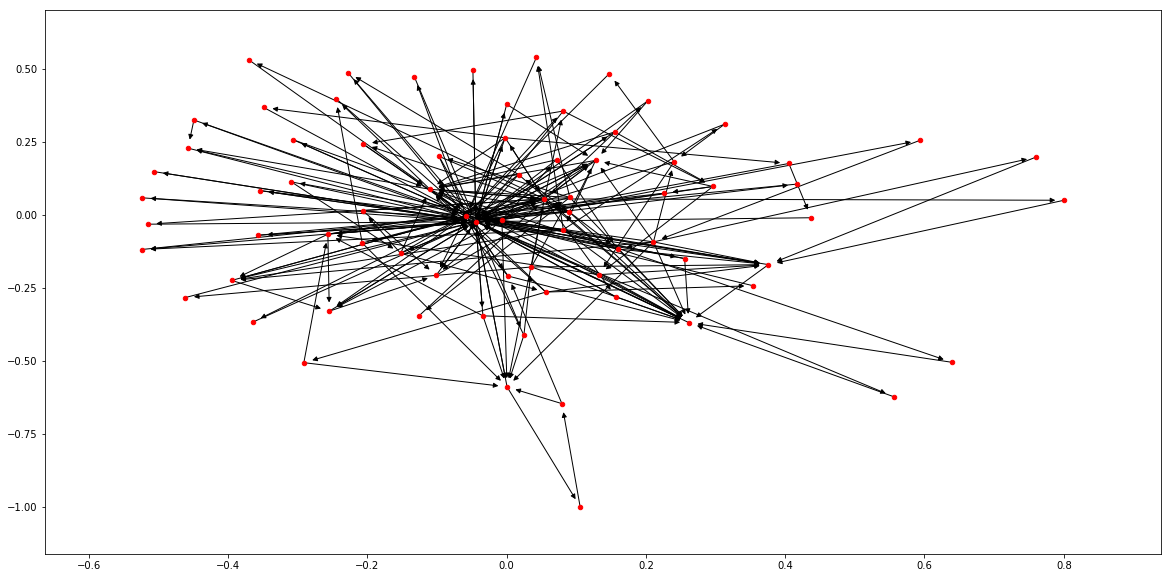

NodeView((0, 1, 2, 43, 5, 230, 8, 393, 13, 14, 16, 88, 147, 20, 149, 406, 23, 280, 666, 27, 30, 415, 278, 35, 167, 1065, 298, 427, 172, 45, 430, 47, 689, 243, 414, 182, 56, 578, 1219, 836, 49, 158, 200, 75, 590, 1231, 208, 209, 210, 83, 853, 633, 197, 985, 220, 93, 917, 611, 101, 102, 362, 988, 237, 110, 222, 112, 211, 495, 1139, 148, 122, 379, 124, 874, 533))

In [3]:
my_dir_graph = gg.clone(dir_graph)
my_dir_graph.draw()
my_dir_graph.nodes

In [4]:
t = ss.WaveEquationSimulation()

In [5]:
t.run(my_dir_graph, c=0.1)

Relaxation: : 100%|██████████| 2000/2000 [00:00<00:00, 7018.79it/s]


In [6]:
S = [node for node in t.peaks.keys() if t.peaks[node] == 1]
T = [node for node in t.peaks.keys() if t.peaks[node] == 0]
print(S)
print(T)

[1, 393, 13, 14, 16, 985, 20, 149, 278, 30, 406, 167, 43, 45, 430, 49, 243, 917, 158, 182, 56, 197, 200, 75, 1231, 210, 211, 853, 689, 93, 101, 362, 1065]
[0, 2, 427, 5, 230, 8, 147, 23, 280, 666, 27, 415, 35, 988, 298, 172, 47, 578, 1219, 836, 590, 208, 209, 633, 88, 220, 222, 611, 102, 237, 110, 414, 112, 83, 495, 1139, 148, 122, 379, 124, 874, 533]


In [7]:
nx.algorithms.cuts.conductance(t.graph, S, T)

1.031496062992126

In [8]:
p_nodes, n_nodes = t.get_cut_nodes()
print(p_nodes)
print(n_nodes)

[1, 393, 13, 14, 16, 985, 20, 149, 278, 30, 406, 167, 43, 45, 430, 49, 243, 917, 158, 182, 56, 197, 200, 75, 1231, 210, 211, 853, 689, 93, 101, 362, 1065]
[0, 2, 427, 5, 230, 8, 147, 23, 280, 666, 27, 415, 35, 988, 298, 172, 47, 578, 1219, 836, 590, 208, 209, 633, 88, 220, 222, 611, 102, 237, 110, 414, 112, 83, 495, 1139, 148, 122, 379, 124, 874, 533]


In [9]:
p_subgraph, n_subgraph = t.get_cut_edges()
print(type(p_subgraph))

<class 'graphs.graphs.DiGraphClone'>


In [10]:
pos, neg = t.get_cut_nodes()
print(pos)
print(neg)

[1, 393, 13, 14, 16, 985, 20, 149, 278, 30, 406, 167, 43, 45, 430, 49, 243, 917, 158, 182, 56, 197, 200, 75, 1231, 210, 211, 853, 689, 93, 101, 362, 1065]
[0, 2, 427, 5, 230, 8, 147, 23, 280, 666, 27, 415, 35, 988, 298, 172, 47, 578, 1219, 836, 590, 208, 209, 633, 88, 220, 222, 611, 102, 237, 110, 414, 112, 83, 495, 1139, 148, 122, 379, 124, 874, 533]


In [11]:
p_edges = [e for e in t.graph.edges if e[0] in pos and e[1] in pos]
print(set(p_edges))

{(1, 149), (1, 917), (45, 1), (75, 13), (149, 182), (1, 430), (14, 13), (182, 1), (211, 20), (101, 1), (1, 20), (1, 56), (1065, 1), (30, 853), (182, 13), (149, 1), (1, 16), (1, 14), (13, 49), (14, 1), (93, 1), (20, 393), (278, 200), (13, 20), (393, 211), (1, 1), (430, 75), (1, 853), (30, 1), (56, 20), (158, 1), (1, 13), (20, 1), (182, 16), (1231, 1), (1, 101), (430, 1), (43, 1), (158, 16), (1, 362), (56, 1), (43, 985), (1, 75), (243, 1), (210, 1), (13, 1), (75, 43), (167, 1), (13, 14), (149, 278), (689, 1), (49, 1), (16, 1), (1, 197), (75, 1), (243, 406), (167, 75), (1, 158), (13, 75)}


In [12]:
n_edges = [e for e in t.graph.edges if e[0] in neg and e[1] in neg]
print(set(n_edges))

{(35, 88), (1219, 2), (47, 2), (8, 172), (110, 5), (124, 988), (35, 8), (2, 1219), (88, 2), (147, 0), (2, 88), (27, 2), (590, 2), (23, 88), (2, 209), (35, 110), (298, 2), (1219, 5), (611, 2), (23, 112), (112, 298), (5, 208), (35, 0), (222, 2), (415, 208), (102, 0), (220, 578), (112, 0), (35, 83), (5, 0), (2, 2), (414, 5), (220, 0), (102, 88), (220, 172), (533, 5), (35, 379), (611, 5), (172, 2), (112, 5), (8, 2), (47, 23), (35, 237), (102, 8), (495, 2), (35, 427), (5, 83), (147, 2), (112, 148), (578, 88), (88, 0), (209, 495), (220, 88), (35, 2), (611, 0), (147, 5), (2, 0), (147, 495), (220, 2), (2, 611), (2, 172), (23, 0), (415, 2), (237, 220), (874, 88), (633, 8), (5, 2), (35, 5)}


In [13]:
set(p_edges).intersection(set(n_edges))

set()

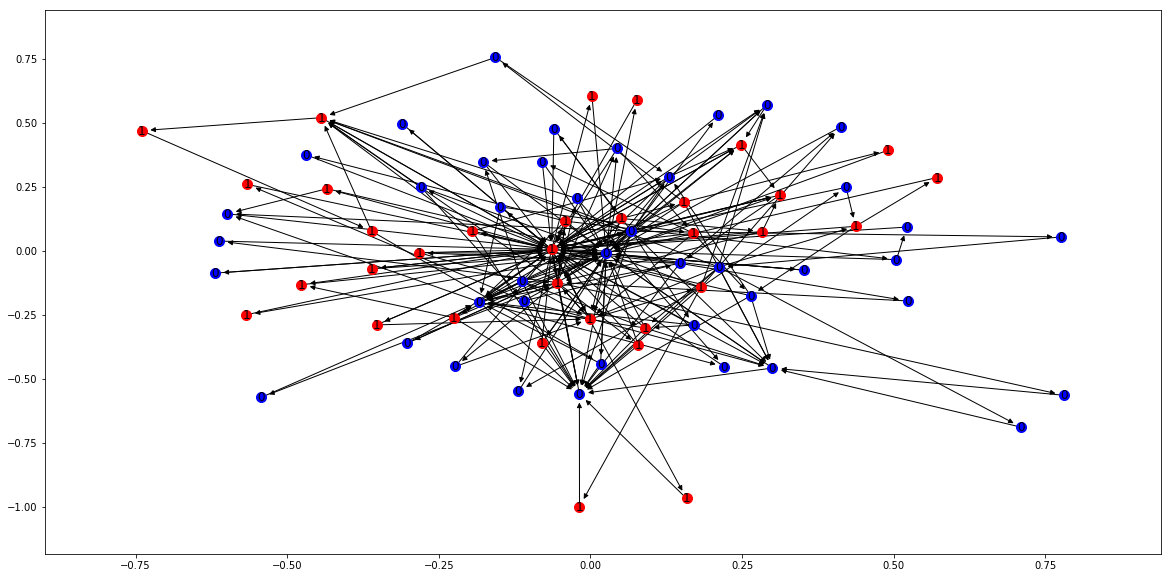

In [14]:
t.highlight_clusters()